# Analysis of Diabetic Retinopathy MAR Experiment

In [92]:
import os

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

In [97]:
# LOAD DATA

dist_df = pd.read_csv('/Users/adamcatto/Dropbox/CUNY/Research/dynamime/Experiment_Trials/diabetic_retinopathy/MAR_Experiment_2022-08-16 15:24:22.078615/MAR/results/distances_0.csv')
dist_df.drop(columns='Unnamed: 0', inplace=True)

err_df = pd.read_csv('/Users/adamcatto/Dropbox/CUNY/Research/dynamime/Experiment_Trials/diabetic_retinopathy/MAR_Experiment_2022-08-16 15:24:22.078615/MAR/results/errors_0.csv')
err_df.drop(columns='Unnamed: 0', inplace=True)

weights_df = pd.read_csv('/Users/adamcatto/Dropbox/CUNY/Research/dynamime/Experiment_Trials/diabetic_retinopathy/MAR_Experiment_2022-08-16 15:24:22.078615/MAR/results/weights_top_None_0.csv')
weights_df.drop(columns='Unnamed: 0', inplace=True)

preds_df = pd.read_csv('/Users/adamcatto/Dropbox/CUNY/Research/dynamime/Experiment_Trials/diabetic_retinopathy/MAR_Experiment_2022-08-16 15:24:22.078615/MAR/results/predictions_0.csv')
preds_df.drop(
    columns=[
        'Unnamed: 0', 'Uniform Model Averaging',
        "<class 'sklearn.ensemble._stacking.StackingClassifier'>", 'dew_top_1',
        'dew_top_3', 'dew_top_None'
    ], inplace=True
)

dew_err = err_df['dew_top_None']
uniform_err = err_df['Uniform Model Averaging']

In [98]:
results = pd.read_csv('/Users/adamcatto/Dropbox/CUNY/Research/dynamime/Experiment_Trials/diabetic_retinopathy/MAR_Experiment_2022-08-16 15:24:22.078615/MAR/final_results.csv')
results

,Unnamed: 0,Estim(XGBClassifier)_Imputer(IterativeImputer(<class 'sklearn.linear_model._bayes.BayesianRidge'>)),Estim(XGBClassifier)_Imputer(IterativeImputer(<class 'xgboost.sklearn.XGBRegressor'>)),Estim(XGBClassifier)_Imputer(IterativeImputer(<class 'sklearn.ensemble._forest.RandomForestRegressor'>)),Estim(XGBClassifier)_Imputer(KNNImputer),Estim(RandomForestClassifier)_Imputer(IterativeImputer(<class 'sklearn.linear_model._bayes.BayesianRidge'>)),Estim(RandomForestClassifier)_Imputer(IterativeImputer(<class 'xgboost.sklearn.XGBRegressor'>)),Estim(RandomForestClassifier)_Imputer(IterativeImputer(<class 'sklearn.ensemble._forest.RandomForestRegressor'>)),Estim(RandomForestClassifier)_Imputer(KNNImputer),Uniform Model Averaging,<class 'sklearn.ensemble._stacking.StackingClassifier'>,dew_top_1,dew_top_3,dew_top_None
0,roc_auc,0.722960,0.706340,0.726040,0.714080,0.720140,0.718440,0.716500,0.709260,0.743700,0.683380,0.709260,0.734500,0.743080
1,accuracy,0.660260,0.636820,0.655940,0.658520,0.656780,0.665500,0.653320,0.633320,0.683720,0.622080,0.643740,0.669820,0.688940
2,weighted_f1_score,0.660001,0.637055,0.656082,0.658597,0.654073,0.662739,0.650108,0.632261,0.683744,0.621392,0.643761,0.669948,0.688986


In [99]:
# CREATE PER-ROW SUMMARY DATAFRAMES

dist_summary_df = dist_df.T.describe().T
err_summary_df = err_df.T.describe().T
weights_summary_df = weights_df.T.describe().T
preds_summary_df = preds_df.T.describe().T

In [100]:
where_dew_outperforms_uniform = np.where(dew_err < uniform_err, 1, 0)
dew_soft_outperforming_uniform = uniform_err - dew_err

pct_dew_better = np.sum(where_dew_outperforms_uniform) / len(where_dew_outperforms_uniform)
print('DEW outperforms uniform model averaging in ' + str(round(pct_dew_better * 100, 2)) + '% of cases.')

DEW outperforms uniform model averaging in 56.56% of cases.


/Users/adamcatto/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


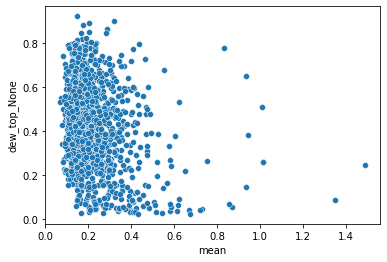

In [101]:
# Correlation analysis

sns.scatterplot(dist_summary_df['mean'], dew_err)
plt.show()

## DEW Outperforming Uniform Model Averaging ~ Summary Statistics

In [102]:
corr_dict = {}
for df_name in ['preds_summary_df','weights_summary_df', 'dist_summary_df']:
    df = eval(df_name)
    cols = df.columns
    corr_dict[df_name] = [np.corrcoef(df[c], dew_soft_outperforming_uniform)[0][1] for c in cols]
    
corr_df = pd.DataFrame(corr_dict)
corr_df.index = cols

/Users/adamcatto/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/adamcatto/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [103]:
corr_df

,preds_summary_df,weights_summary_df,dist_summary_df
count,NaN,NaN,NaN
mean,0.040329,0.023156,0.009051
std,0.088386,-0.041271,0.005160
min,0.022808,0.010053,0.001298
25%,0.010732,0.033719,0.008075
50%,0.038929,-0.010816,0.018587
75%,0.064368,-0.021463,0.012361
max,0.056947,-0.029033,0.000935


In [104]:
# significances_df = corr_df.apply(lambda x: x * np.sqrt(len(dew_err) - 2) / np.sqrt(1 - x**2))
significances_df = corr_df.apply(lambda x: scipy.stats.t.sf(
    abs(x * np.sqrt(len(dew_err) - 2) / np.sqrt(1 - x**2)), 
    df=len(dew_err))
) * 2
significances_df

,preds_summary_df,weights_summary_df,dist_summary_df
count,NaN,NaN,NaN
mean,0.171532,0.432546,0.759031
std,0.002689,0.161740,0.861180
min,0.439490,0.733322,0.964914
25%,0.716072,0.253025,0.784355
50%,0.186907,0.713944,0.528730
75%,0.028986,0.466941,0.675278
max,0.053424,0.325055,0.974734


## DEW Error Rate ~ Summary Statistics

In [105]:
# DEW error rate ~ summary statistics

corr_dict = {}
for df_name in ['preds_summary_df','weights_summary_df', 'dist_summary_df']:
    df = eval(df_name)
    cols = df.columns
    corr_dict[df_name] = [np.corrcoef(df[c], dew_err)[0][1] for c in cols]
    
corr_df = pd.DataFrame(corr_dict)
corr_df.index = cols


/Users/adamcatto/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/adamcatto/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [106]:
corr_df

,preds_summary_df,weights_summary_df,dist_summary_df
count,NaN,NaN,NaN
mean,-0.389397,-0.044524,-0.231069
std,0.287725,0.152896,-0.085437
min,-0.417340,-0.114236,-0.230427
25%,-0.381224,-0.076311,-0.232655
50%,-0.420373,0.004351,-0.228665
75%,-0.377530,0.091021,-0.227812
max,-0.245066,0.124811,-0.217602


In [107]:
# significances_df = corr_df.apply(lambda x: x * np.sqrt(len(dew_err) - 2) / np.sqrt(1 - x**2))
significances_df = corr_df.apply(lambda x: scipy.stats.t.sf(
    abs(x * np.sqrt(len(dew_err) - 2) / np.sqrt(1 - x**2)), 
    df=len(dew_err))
) * 2
significances_df

,preds_summary_df,weights_summary_df,dist_summary_df
count,NaN,NaN,NaN
mean,5.568811e-43,1.311341e-01,2.043710e-15
std,2.221126e-23,1.865089e-07,3.723042e-03
min,9.879800e-50,1.026861e-04,2.452281e-15
25%,3.989299e-41,9.600037e-03,1.298630e-15
50%,1.669217e-50,8.827791e-01,4.036290e-15
75%,2.644075e-40,1.994223e-03,5.129058e-15
max,3.331380e-17,2.172046e-05,8.381595e-14


In [108]:
pd.read_csv('/Users/adamcatto/Dropbox/CUNY/Research/dynamime/Experiment_Trials/eeg_eye_state/MCAR_Experiment_2022-08-16 15:45:56.188662/MCAR/final_results.csv')

,Unnamed: 0,Estim(XGBClassifier)_Imputer(IterativeImputer(<class 'sklearn.linear_model._bayes.BayesianRidge'>)),Estim(XGBClassifier)_Imputer(IterativeImputer(<class 'xgboost.sklearn.XGBRegressor'>)),Estim(XGBClassifier)_Imputer(IterativeImputer(<class 'sklearn.ensemble._forest.RandomForestRegressor'>)),Estim(XGBClassifier)_Imputer(KNNImputer),Estim(RandomForestClassifier)_Imputer(IterativeImputer(<class 'sklearn.linear_model._bayes.BayesianRidge'>)),Estim(RandomForestClassifier)_Imputer(IterativeImputer(<class 'xgboost.sklearn.XGBRegressor'>)),Estim(RandomForestClassifier)_Imputer(IterativeImputer(<class 'sklearn.ensemble._forest.RandomForestRegressor'>)),Estim(RandomForestClassifier)_Imputer(KNNImputer),Uniform Model Averaging,<class 'sklearn.ensemble._stacking.StackingClassifier'>,dew_top_1,dew_top_3,dew_top_None
0,roc_auc,0.818220,0.841220,0.83758,0.800940,0.728320,0.745160,0.741520,0.730900,0.83482,0.823920,0.826940,0.847080,0.837960
1,accuracy,0.741020,0.756340,0.75610,0.723360,0.669100,0.678600,0.679020,0.667720,0.75426,0.744800,0.747580,0.762960,0.757360
2,weighted_f1_score,0.738768,0.753862,0.75434,0.720215,0.653628,0.666232,0.667863,0.650293,0.74883,0.743208,0.744939,0.759769,0.752228


In [112]:
dist_df

,0,1,2,3,4,5,6
0,0.217670,0.239112,0.245628,0.259019,0.260103,0.266582,0.270324
1,0.213070,0.217315,0.237301,0.245125,0.245315,0.250487,0.250857
2,0.112585,0.131251,0.153239,0.158405,0.164108,0.173221,0.189801
3,0.271142,0.308393,0.311468,0.358150,0.438433,0.551648,0.749612
4,0.256570,0.290599,0.293643,0.296792,0.335456,0.338612,0.348253
...,...,...,...,...,...,...,...
1146,0.147408,0.161545,0.197759,0.206265,0.211663,0.223164,0.226006
1147,0.195580,0.211685,0.232403,0.236430,0.241573,0.252282,0.253129
1148,0.110924,0.225703,0.256043,0.288981,0.324642,0.327992,0.340033
1149,0.235765,0.248549,0.257018,0.261319,0.295949,0.325150,0.331607
